# P-1.
![image.png](https://raw.githubusercontent.com/Pokemongle/img_bed_0/main/img/20251125164345.png)

$$
\begin{aligned}
& g(\mathbf w)
= \frac{1}{P}\sum_{p=1}^{P}\left[
\log\left(\sum_{j=0}^{C-1} e^{\bar{\mathbf x}_p^\top \mathbf w_j}\right)
- \bar{\mathbf x}_p^\top \mathbf w_{y_p}
\right] \\[6pt]
&\text{For } C=2,\ y_p\in\{0,1\}, \\[4pt]
& g(\mathbf w_0,\mathbf w_1)
= \frac{1}{P}\sum_{p=1}^{P}\left[
\log\left(e^{\bar{\mathbf x}_p^\top \mathbf w_0}
+ e^{\bar{\mathbf x}_p^\top \mathbf w_1}\right)
- \bar{\mathbf x}_p^\top \mathbf w_{y_p}
\right] \\[6pt]
& =
\frac{1}{P}\sum_{p=1}^{P}
\begin{cases}
\log\left(1 + e^{\bar{\mathbf x}_p^\top(\mathbf w_1 - \mathbf w_0)}\right), & y_p = 0,\\[6pt]
\log\left(1 + e^{\bar{\mathbf x}_p^\top(\mathbf w_0 - \mathbf w_1)}\right), & y_p = 1,
\end{cases} \\[10pt]
&\text{Let }\mathbf w = \mathbf w_1 - \mathbf w_0, \\[4pt]
& \ell_p =
\begin{cases}
\log\left(1 + e^{\bar{\mathbf x}_p^\top \mathbf w}\right), & y_p = 0,\\[6pt]
\log\left(1 + e^{-\bar{\mathbf x}_p^\top \mathbf w}\right), & y_p = 1,
\end{cases} \\[10pt]
&\text{Define } t_p = 2y_p - 1 \in \{-1,1\}, \\[4pt]
& \ell_p = \log\left(1 + e^{-t_p\,\bar{\mathbf x}_p^\top \mathbf w}\right), \\[10pt]
& g(\mathbf w)
= \frac{1}{P}\sum_{p=1}^{P}
\log\left(1 + e^{-t_p\,\bar{\mathbf x}_p^\top \mathbf w}\right).
\end{aligned}
$$

# P-2 
![image.png](https://raw.githubusercontent.com/Pokemongle/img_bed_0/main/img/20251125174018.png)

## a. 

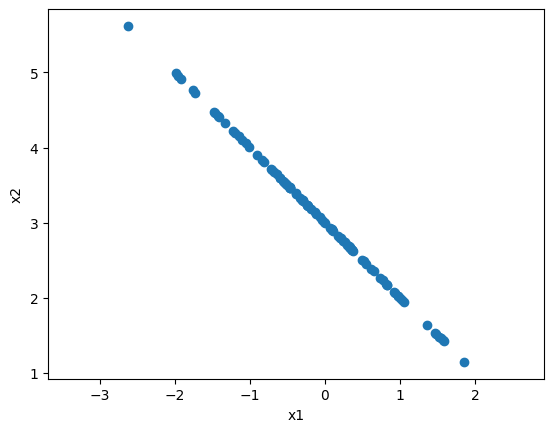

Eigenvalues: [1.64953979e+00 9.15678526e-17]
Reconstruction error (K=1): 2.704257893603411e-31


In [ ]:
import numpy as np
import matplotlib.pyplot as plt 

np.random.seed(42)

P = 100
x1 = np.random.randn(P)
x2 = 3 - x1
X = np.column_stack([x1, x2])          

# 1. scatter plot
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis("equal")
plt.show()

# 2. Compute Principle components 
# center the data
mu = X.mean(axis=0, keepdims=True)
Xc = X - mu

Sigma = np.cov(Xc, rowvar=False)
eigvals, eigvecs = np.linalg.eigh(Sigma)
idx = eigvals.argsort()[::-1]
eigvals = eigvals[idx]
eigvecs = eigvecs[:, idx]

# K = 1
C = eigvecs[:, :1]         

# 3. Compute error: (1/P) sum ||C w_p - x_p||^2
W = Xc @ C                 
Xc_rec = W @ C.T           
X_rec = Xc_rec + mu        

err = np.mean(np.sum((X_rec - X)**2, axis=1))
print("Eigenvalues:", eigvals)
print("Reconstruction error (K=1):", err)


Because the generated data satisfy $x_2=3-x_1$, all 100 points lie exactly on a straight line in 2-D.
Therefore the data have only one intrinsic direction of variance.  
PCA returns:
- 1 principal component with a non-zero eigenvalue,
- 1 principal component with eigenvalue ≈ 0. 
  
Thus, although the ambient dimension is 2, there is only one meaningful principal component because the data lie on a 1-dimensional subspace (a line).

## b. & c.

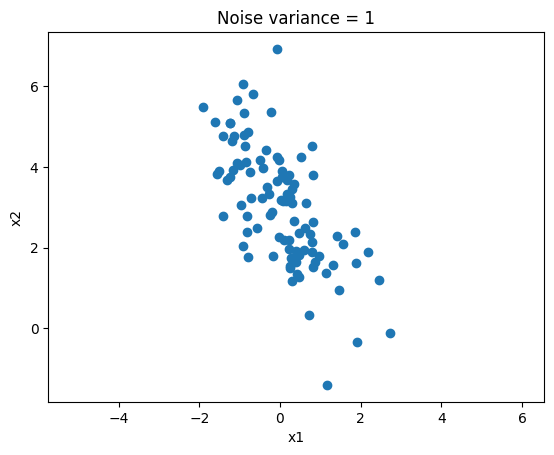

Noise var = 1, eigenvalues: [2.67054611 0.39985015]
Reconstruction error (K=1): 0.3958516445336137


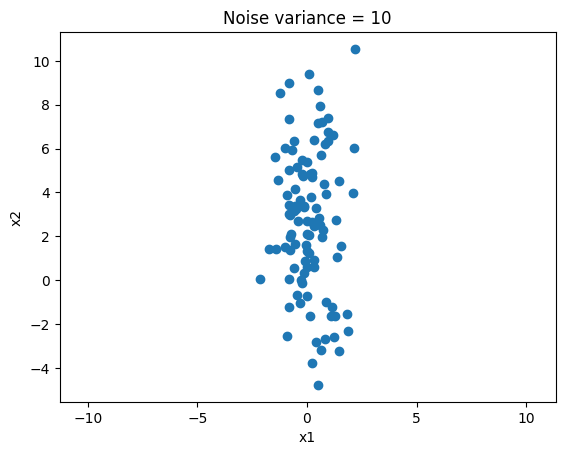

Noise var = 10, eigenvalues: [10.82457694  0.77955748]
Reconstruction error (K=1): 0.7717619024059066


In [ ]:
import numpy as np
import matplotlib.pyplot as plt 

def pca_1d_error(P=100, noise_var=1.0, make_plot=False, title=None):
    # generate data: x2 = 3 - x1 + w, w ~ N(0, noise_var)
    x1 = np.random.randn(P)
    w = np.sqrt(noise_var) * np.random.randn(P)
    x2 = 3 - x1 + w
    X = np.column_stack([x1, x2])          
    if make_plot:
        plt.scatter(X[:, 0], X[:, 1])
        plt.xlabel("x1")
        plt.ylabel("x2")
        plt.axis("equal")
        if title is not None:
            plt.title(title)
        plt.show()

    mu = X.mean(axis=0, keepdims=True)
    Xc = X - mu

    Sigma = np.cov(Xc, rowvar=False)
    eigvals, eigvecs = np.linalg.eigh(Sigma)
    idx = eigvals.argsort()[::-1]
    eigvals = eigvals[idx]
    eigvecs = eigvecs[:, idx]

    C = eigvecs[:, :1]           

    W = Xc @ C                   

    X_rec = W @ C.T + mu         

    err = np.mean(np.sum((X_rec - X) ** 2, axis=1))
    return err, eigvals

# (b) noise variance = 1
err1, evals1 = pca_1d_error(noise_var=1.0, make_plot=True,
                            title="Noise variance = 1")
print("Noise var = 1, eigenvalues:", evals1)
print("Reconstruction error (K=1):", err1)

# (c) noise variance = 10
err10, evals10 = pca_1d_error(noise_var=10.0, make_plot=True,
                              title="Noise variance = 10")
print("Noise var = 10, eigenvalues:", evals10)
print("Reconstruction error (K=1):", err10)


## d.
From parts (b) and (c), the reconstruction error with one principal component (K = 1) is

- Noise variance = 1: error ≈ 0.40  
- Noise variance = 10: error ≈ 0.78  

So the error increases as the noise variance increases.

The reason is that PCA with K = 1 can only represent variability along a single direction.  
In the noiseless case, all points lie exactly on a line, so this one-dimensional subspace is sufficient.  
When we add Gaussian noise to the second coordinate, we introduce variance in the direction orthogonal to the main line. This orthogonal variance cannot be captured by a 1-D PCA subspace, so it appears entirely as reconstruction error.

As the noise variance grows (from 1 to 10), the spread of the data around the main line becomes larger, the second eigenvalue increases, and consequently the average reconstruction error using only the first principal component also increases.

# P-3
![image.png](https://raw.githubusercontent.com/Pokemongle/img_bed_0/main/img/20251125182358.png)

$$
\begin{aligned}
&\text{Let the data be centered and define the covariance matrix}
\quad
\Sigma = \frac{1}{P}\sum_{p=1}^P x_p x_p^\top. \\[4pt]

&\text{Let } C \in \mathbb{R}^{D\times K},\ C^\top C = I_K,\ 
w_p = C^\top x_p,\ 
\hat x_p = C w_p = C C^\top x_p. \\[6pt]

&\text{The reconstruction error is}
\quad
J(C) = \frac{1}{P}\sum_{p=1}^P \| \hat x_p - x_p \|^2
      = \frac{1}{P}\sum_{p=1}^P \| C C^\top x_p - x_p \|^2. \\[6pt]

&\text{Expand the square:}
\quad
\|C C^\top x_p - x_p\|^2
= x_p^\top x_p - x_p^\top C C^\top x_p. \\[4pt]

&\text{Thus}
\quad
J(C)
= \frac{1}{P}\sum_{p=1}^P x_p^\top x_p 
 - \frac{1}{P}\sum_{p=1}^P x_p^\top C C^\top x_p. \\[6pt]

&\text{The first term does not depend on } C. 
\text{ For the second term, write}
\quad
x_p^\top C C^\top x_p = \mathrm{tr}(C^\top x_p x_p^\top C). \\[4pt]

&\text{Hence}
\quad
\frac{1}{P}\sum_{p=1}^P x_p^\top C C^\top x_p
= \mathrm{tr}\!\left(C^\top \left(\frac{1}{P}\sum_{p=1}^P x_p x_p^\top\right) C \right)
= \mathrm{tr}(C^\top \Sigma C). \\[6pt]

&\text{So minimizing } J(C) 
\text{ is equivalent to maximizing } \mathrm{tr}(C^\top \Sigma C)
\text{ subject to } C^\top C = I_K. \\[4pt]

&\text{By the Rayleigh–Ritz theorem, this maximum is achieved when the columns of } C
\text{ are the eigenvectors of } \Sigma \\
&\text{corresponding to the largest } K \text{ eigenvalues. Thus PCA minimizes the reconstruction error}.
\end{aligned}
$$

# P-4 
![image.png](https://raw.githubusercontent.com/Pokemongle/img_bed_0/main/img/20251125184027.png)

$$
\begin{aligned}
&\text{Find } a,b \text{ such that }
x = a c_1 + b c_2, \\[4pt]
&x = \begin{bmatrix}1\\2\end{bmatrix},
c_1 = \begin{bmatrix}1\\1\end{bmatrix},
c_2 = \begin{bmatrix}-1\\1\end{bmatrix}. \\[8pt]
&\text{Solve}
\begin{bmatrix}
1 & -1 \\
1 & \phantom{-}1
\end{bmatrix}
\begin{bmatrix}
a \\ b
\end{bmatrix}
=
\begin{bmatrix}
1 \\ 2
\end{bmatrix}. \\[8pt]
&\Rightarrow
\begin{cases}
a - b = 1, \\
a + b = 2,
\end{cases}
a = \frac{3}{2},\ b = \frac{1}{2}. \\[8pt]
&\text{Thus }
x = \frac{3}{2}c_1 + \frac{1}{2}c_2.
\end{aligned}
$$


# P-5
![image.png](https://raw.githubusercontent.com/Pokemongle/img_bed_0/main/img/20251125184418.png)

$$
\begin{aligned}
& x = \begin{bmatrix}1 \\ 2\end{bmatrix}. \\[6pt]

&\text{1. Using } c_1 = \begin{bmatrix}1 \\ 1\end{bmatrix}: \\[4pt]
& w = \frac{c_1^\top x}{c_1^\top c_1} = \frac{3}{2},\qquad \\
& \tilde{x} = w\,c_1 = \begin{bmatrix}1.5 \\ 1.5\end{bmatrix}, \\[4pt]
& \|x - \tilde{x}\|^2 = 0.5. \\[10pt]

&\text{2. Using }c_1 = \begin{bmatrix}-1 \\ 1\end{bmatrix}: \\[4pt]
& w = \frac{c_1^\top x}{c_1^\top c_1}
  = \frac{1}{2},\qquad\\
& \tilde{x} = w\,c_1 = \begin{bmatrix}-0.5 \\ 0.5\end{bmatrix}, \\[4pt]
& \|x - \tilde{x}\|^2 = 4.5.
\end{aligned}
$$

# P-6
![image.png](https://raw.githubusercontent.com/Pokemongle/img_bed_0/main/img/20251125184919.png)  
![image.png](https://raw.githubusercontent.com/Pokemongle/img_bed_0/main/img/20251125184954.png)

In [ ]:
import numpy as np
import math
xs = np.array([[1,1],[1,2],[2,1],[2,3],[3,3],[4,2],[3,2]], float)
ys = np.array([0,0,0,1,1,2,2], int)

w0 = np.array([-4,1,1], float)
w1 = np.array([-2.5,0,1], float)
w2 = np.array([-3.5,1,0.1], float)
W  = np.stack([w0,w1,w2])

Ws = []
for w in W:
    scale = math.sqrt(w[1]**2 + w[2]**2)
    Ws.append(w/scale)
Ws = np.stack(Ws)              

barx   = np.hstack([np.ones((7,1)), xs])
logits = barx @ Ws.T           

losses = []
for p in range(7):
    z   = logits[p]
    lse = math.log(sum(math.exp(v) for v in z))
    losses.append(lse - z[ys[p]])

cost = sum(losses) / 7
print(f"The multi-class softmax cost is: {cost}")


The multi-class softmax cost is: 1.0546524759881353


# P-7
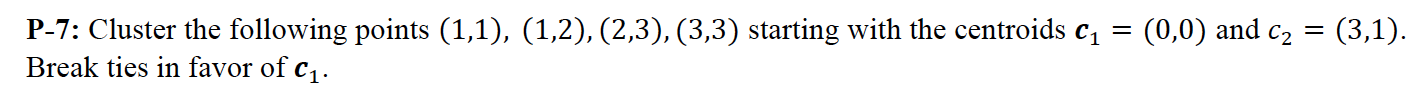

$$
\begin{aligned}
c_1 &= (0,0),\quad c_2 = (3,1). \\[4pt]
d((1,1),c_1) &= \sqrt{(1-0)^2+(1-0)^2} = \sqrt{2}, \\
d((1,1),c_2) &= \sqrt{(1-3)^2+(1-1)^2} = 2 \;\Rightarrow\; (1,1)\to c_1. \\[6pt]
d((1,2),c_1) &= \sqrt{(1-0)^2+(2-0)^2} = \sqrt{5}, \\
d((1,2),c_2) &= \sqrt{(1-3)^2+(2-1)^2} = \sqrt{5}
\;\Rightarrow\; \text{tie} \Rightarrow (1,2)\to c_1. \\[6pt]
d((2,3),c_1) &= \sqrt{(2-0)^2+(3-0)^2} = \sqrt{13}, \\
d((2,3),c_2) &= \sqrt{(2-3)^2+(3-1)^2} = \sqrt{5}
\;\Rightarrow\; (2,3)\to c_2. \\[6pt]
d((3,3),c_1) &= \sqrt{(3-0)^2+(3-0)^2} = \sqrt{18}, \\
d((3,3),c_2) &= \sqrt{(3-3)^2+(3-1)^2} = 2
\;\Rightarrow\; (3,3)\to c_2.
\end{aligned}
$$
$$\text{Cluster 1 (center } c_1):\quad (1,1),\ (1,2)$$
$$\text{Cluster 2 (center } c_2):\quad (2,3),\ (3,3)$$